## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
dataset = pd.read_csv('titanic.csv')

In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: 177 значень з пропущеним віком, 687 без вказаної каюти та 2 значення без вказаного порту відправлення

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



<Axes: >

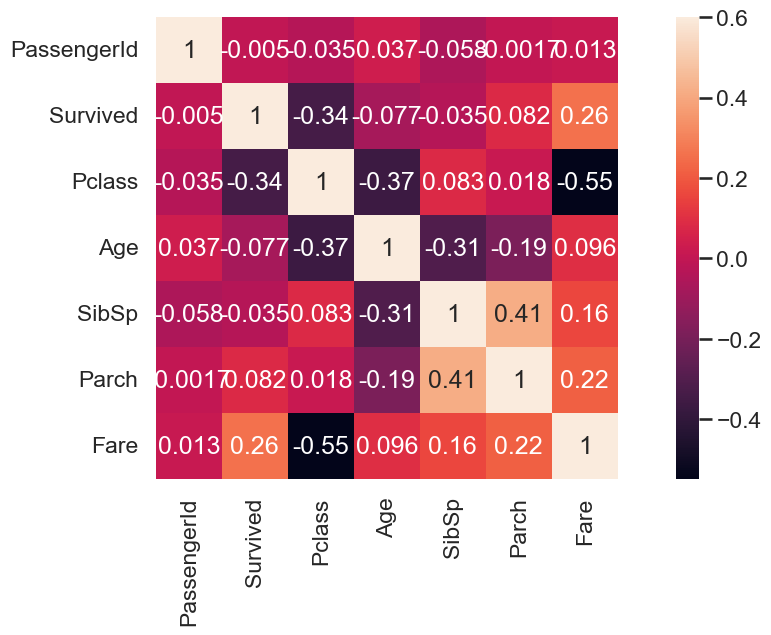

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.select_dtypes(include=['number']).corr(method="pearson"), vmax=0.6, square=True, annot=True)

Ваші висновки: виживаність найбільше залежала від статі, класу та вартості квитка

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [8]:
def DfClean(ds, attribute, listWithSomeAttributes):
    listWithSomeAttributes.append(attribute)

    for x in listWithSomeAttributes:
        if ds[x].dtypes == object:
            ds[x].replace(np.nan, ds[x].value_counts().idxmax(), inplace = True)
            
        if ds[x].dtypes == float or dataset[x].dtype == int:
            ds[x].replace(np.nan, ds[x].median(), inplace = True)
            
    return ds
DfClean(dataset, "Cabin", ['Age', "Embarked"])

/var/folders/nx/w9vw8hm92w7dxpxrs9llzqy40000gn/T/ipykernel_18042/1546106675.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[x].replace(np.nan, ds[x].median(), inplace = True)
/var/folders/nx/w9vw8hm92w7dxpxrs9llzqy40000gn/T/ipykernel_18042/1546106675.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





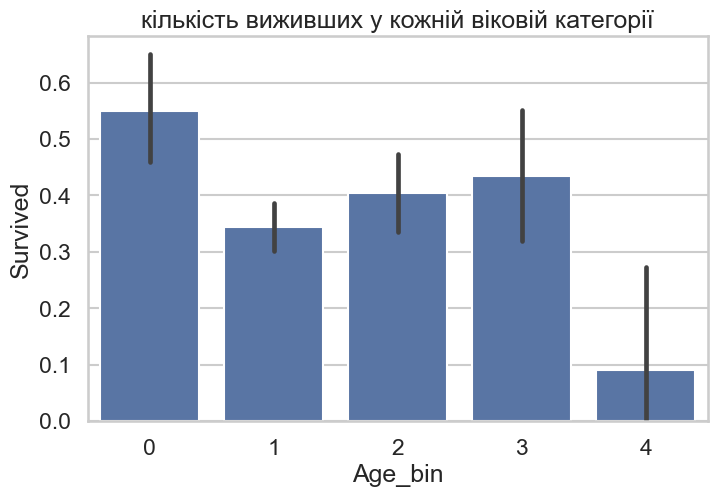

In [9]:
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])

plt.figure(figsize=(8, 5))
sns.barplot(x=dataset['Age_bin'], y=dataset['Survived'])
plt.title("кількість виживших у кожній віковій категорії")
plt.show()

Ваші висновки: найвищий рівень виживаності спостерігається серед дітей (0-16 років), тоді як найнижчий – серед найстарших пасажирів (64-80 років)

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [10]:
dataset['Fare_bin'] = pd.qcut(dataset['Fare'], 4)
dataset[['Fare_bin', 'Survived']].groupby(['Fare_bin'], as_index=False).sum()

/var/folders/nx/w9vw8hm92w7dxpxrs9llzqy40000gn/T/ipykernel_18042/121047020.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset[['Fare_bin', 'Survived']].groupby(['Fare_bin'], as_index=False).sum()


,Fare_bin,Survived
0,"(-0.001, 7.91]",44
1,"(7.91, 14.454]",68
2,"(14.454, 31.0]",101
3,"(31.0, 512.329]",129


Ваші висновки: кількість виживших пасажирів зростає зі збільшенням вартості квитка, тому кодування цієї змінної є доцільним

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [11]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = dataset['Family_size'].apply(lambda x: 1 if x == 0 else 0)

print(dataset[['Family_size', 'Alone']].head())

   Family_size  Alone
0            1      0
1            1      0
2            0      1
3            1      0
4            0      1


Ваші висновки: більші родини мали більші шанси на виживання

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [12]:
ds = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Fare_bin,Family_size,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,"(-0.001, 7.91]",1,0
1,1,1,female,38.0,1,0,71.2833,C,2,"(31.0, 512.329]",1,0
2,1,3,female,26.0,0,0,7.9250,S,1,"(7.91, 14.454]",0,1
3,1,1,female,35.0,1,0,53.1000,S,2,"(31.0, 512.329]",1,0
4,0,3,male,35.0,0,0,8.0500,S,2,"(7.91, 14.454]",0,1


Ваші висновки: я видалила PassengerId, Name, Ticket, оскільки вони не впливають на виживаність та Cabin, бо має багато пропущених значень

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [13]:
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})

dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

if 'Name' in dataset.columns:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    title_mapping = {
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Lady': 'Other', 'Countess': 'Other', 'Capt': 'Other',
        'Col': 'Other', 'Don': 'Other', 'Dr': 'Other',
        'Major': 'Other', 'Rev': 'Other', 'Sir': 'Other',
        'Jonkheer': 'Other', 'Dona': 'Other'
    }
    dataset['Title'] = dataset['Title'].replace(title_mapping)

    title = {title: idx for idx, title in enumerate(dataset['Title'].unique())}
    dataset['Title'] = dataset['Title'].map(title)

dataset.head()

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/var/folders/nx/w9vw8hm92w7dxpxrs9llzqy40000gn/T/ipykernel_18042/3120822716.py:6: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin,Family_size,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2,1,"(-0.001, 7.91]",1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,"(31.0, 512.329]",1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2,1,"(7.91, 14.454]",0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,"(31.0, 512.329]",1,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2,2,"(7.91, 14.454]",0,1,0


***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



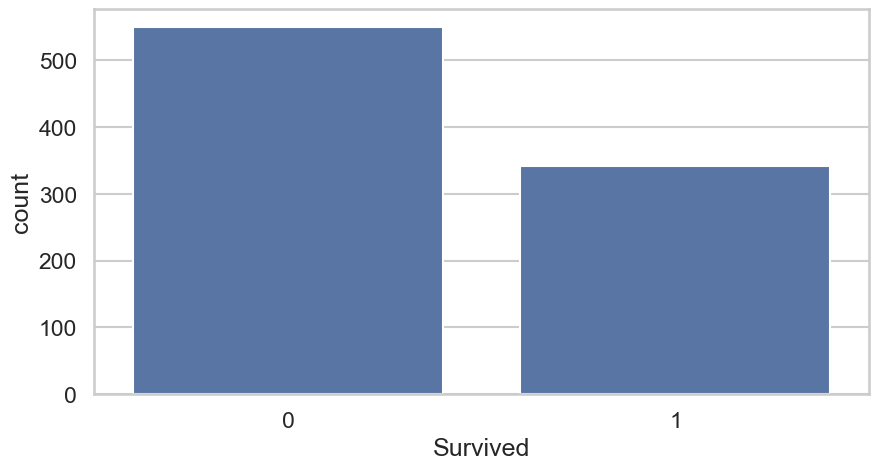

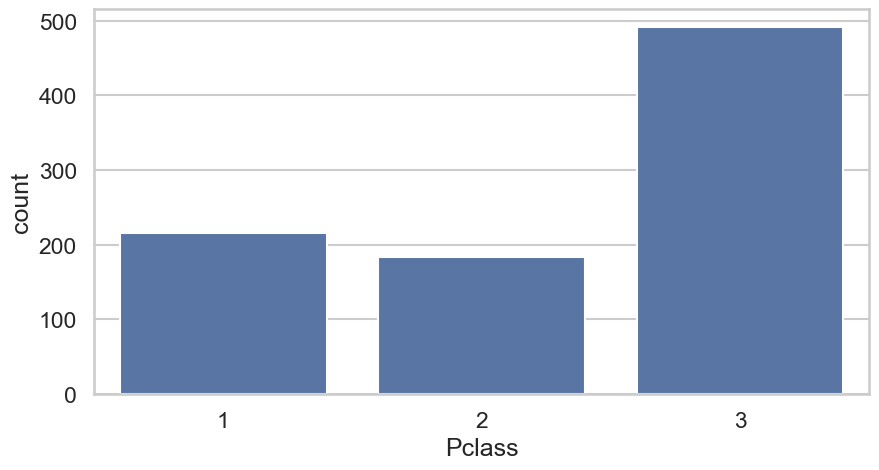

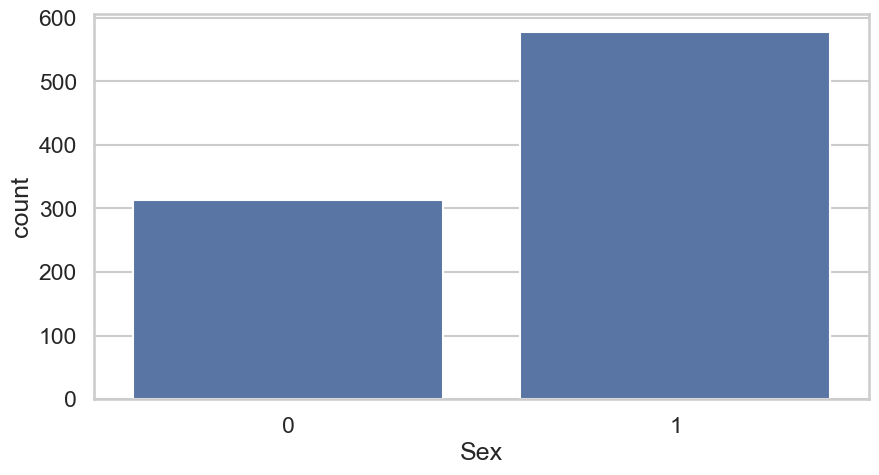

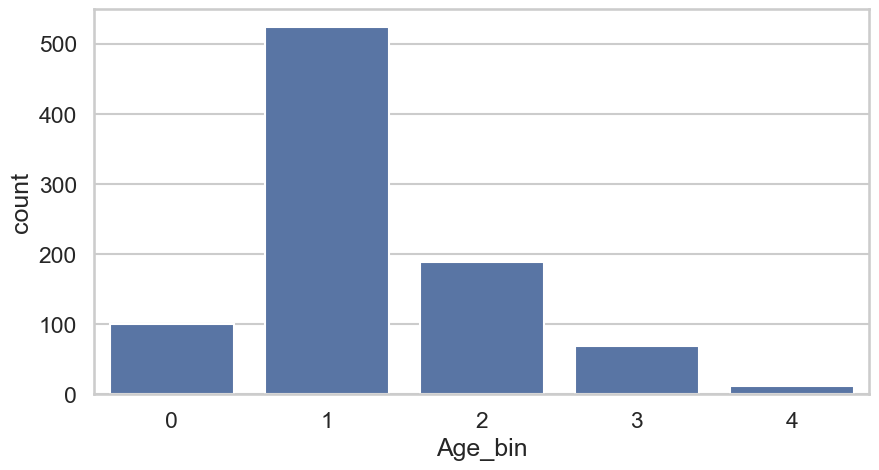

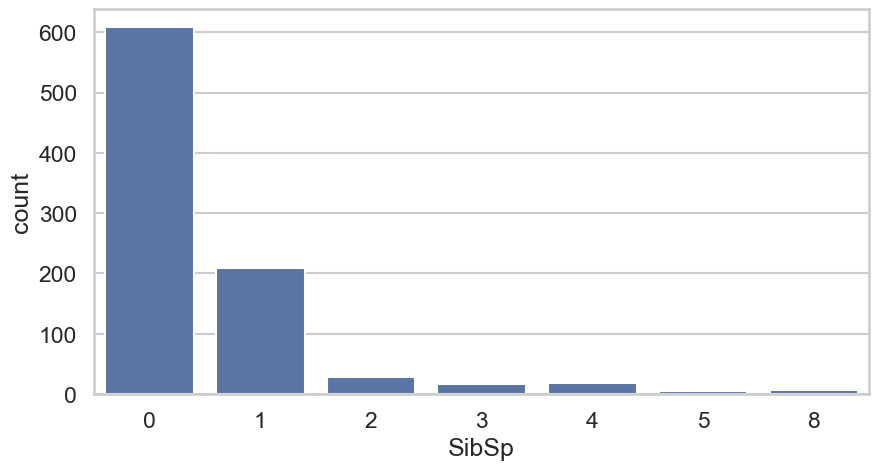

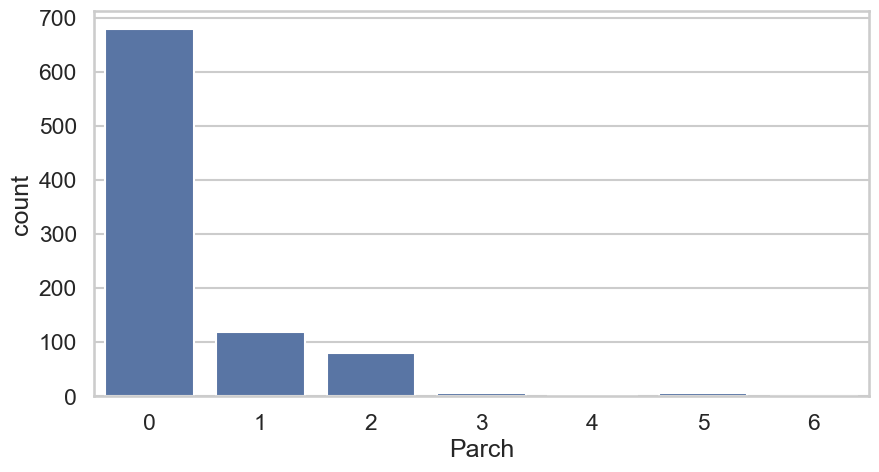

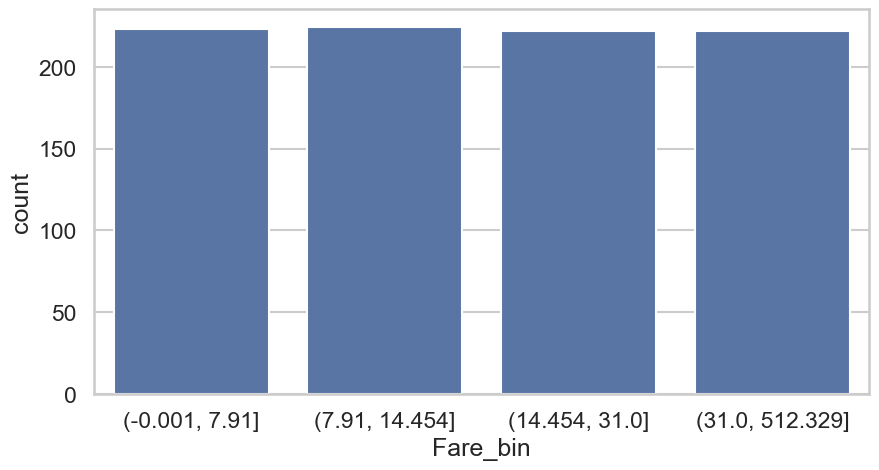

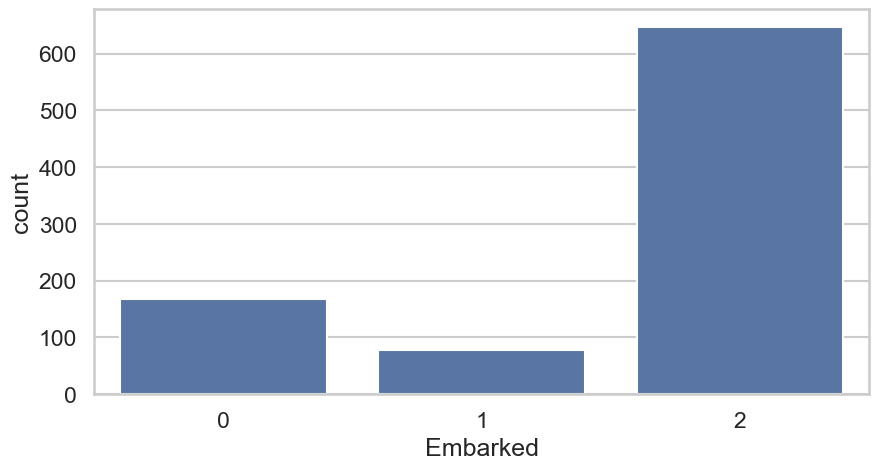

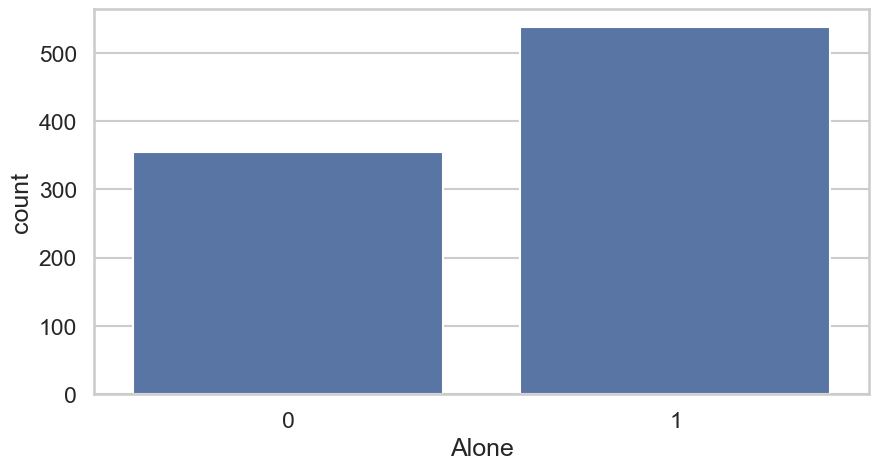

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Age_bin', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='SibSp', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Parch', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Fare_bin', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Embarked', data=dataset)

plt.figure(figsize=(10,5))
sns.countplot(x='Alone', data=dataset)

plt.show()

Ваші висновки: найбільше пасажирів подорожувало в 3-му класі, а близько 60% подорожували без сім’ї

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

<Axes: xlabel='Fare', ylabel='Count'>

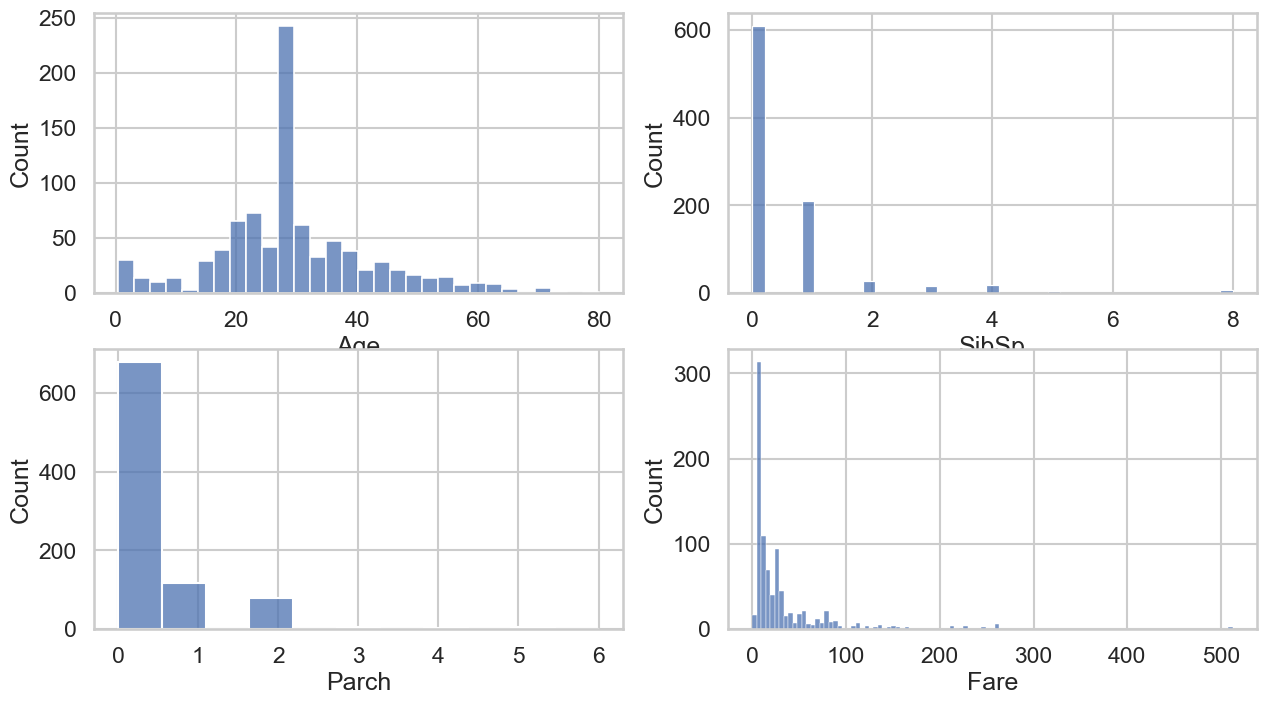

In [15]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 8))
sns.histplot(data = dataset, x = 'Age',  ax = ax1)
sns.histplot(data = dataset, x = 'SibSp', ax = ax2)
sns.histplot(data = dataset, x = 'Parch', ax = ax3)
sns.histplot(data = dataset, x = 'Fare', ax = ax4)

Ваші висновки: розподіл віку показує, що більшість пасажирів були у віці 20-40 років, змінні SibSp і Parch мають значну кількість пасажирів без родичів на борту, Fare має сильний перекіс вправо, що вказує на невелику кількість пасажирів, які заплатили значно більше за квиток

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

<Axes: >

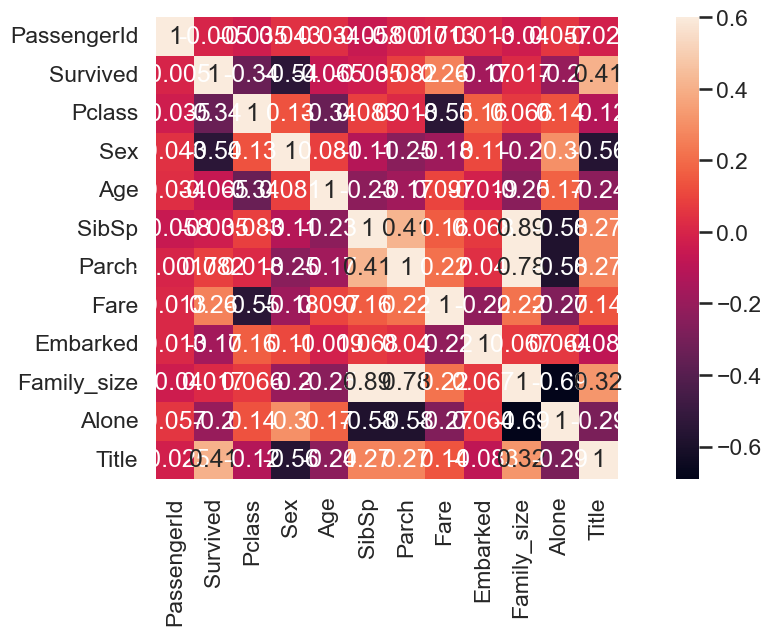

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.select_dtypes(include=['number']).corr(method="pearson"), vmax=0.6, square=True, annot=True)

Ваші висновки: кореляційний аналіз показав, що виживаність найбільше пов’язана з статтю (Sex, -0.54), класом квитка (Pclass, -0.35) та вартістю квитка (Fare, 0.26)

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.